In [2]:
import principal_portfolios as pp
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# FX DATA:

In [3]:
# I did not put this function in the other file. Because it is very specific and is designed for my data.
def process_fx_dataset(adress):
    df = pd.read_excel(adress, skiprows=2)
    df = pp.invert_usd_columns(df)
    df = df.rename(columns={"Currency":"date"})
    df['date'] = pp.convert_date_column_for_monthly_data(df)
    return df

In [4]:
# Importing spot data of developed currencies
data_to_read_address = ["data/developed_countries_spot_monthly_1996_2024.xlsx",
                        "data/developed_countries_futures_monthly_1996_2024.xlsx"]
dataset_spot = data_to_read_address[0]
dataset_futures = data_to_read_address[1]

developed_countries_spot_monthly = process_fx_dataset(dataset_spot)
developed_countries_futures_monthly = process_fx_dataset(dataset_futures)

developed_countries_simple_return_monthly = pp.calculate_log_FX_excess_returns(developed_countries_spot_monthly,developed_countries_spot_monthly)

## Momentum as signal

dict_keys(['developed_countries_excess_returns_momentum_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df'])
return_of_simple_factor          -0.078479
realized_return_of_first_n_PP    -0.272611
realized_return_of_first_n_PEP   -0.244130
realized_return_of_first_n_PAP    0.497125
realized_return_of_1_PP          -0.436690
realized_return_of_1_PEP         -0.364109
realized_return_of_2_PP           0.059641
realized_return_of_2_PEP          0.212786
realized_return_of_3_PP           0.074035
realized_return_of_3_PEP         -0.489210
realized_return_of_4_PP          -0.425302
realized_return_of_4_PEP         -0.217988
realized_return_of_5_PP           0.339002
realized_return_of_5_PEP          0.073932
realized_return_of_6_PP           0.426491
realized_return_of_6_PEP         -0.061658
realized_return_of_7_PP          -0.331270
realized_ret

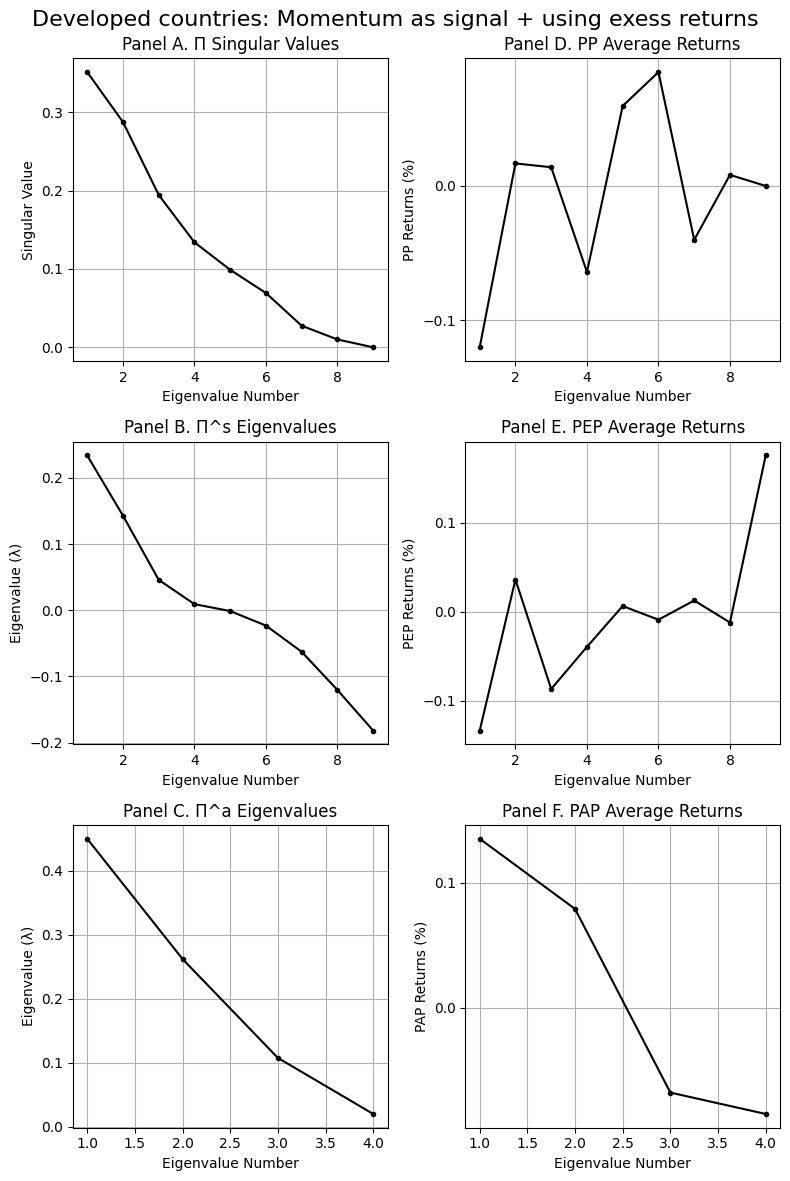

In [5]:
starting_year_to_filter = 1996
end_year_to_filter = 2024
number_of_lookback_periods = 120
number_of_PPs_to_consider = 2
number_of_PEPs_to_consider = 2
number_of_PAPs_to_consider = 2
output_dict_momentum = {}

developed_countries_excess_return_monthly = pp.calculate_log_FX_excess_returns(developed_countries_spot_monthly,developed_countries_futures_monthly)
# using past month's momentum as the signal
signal_df = pp.build_signal_df_for_1month_momentum(developed_countries_excess_return_monthly)
portfolios_key = "developed_countries_excess_returns_momentum_monthly"
output_dict_momentum[portfolios_key] = pp.build_PP(developed_countries_excess_return_monthly,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=None, number_of_PPs_to_consider=number_of_PPs_to_consider,
                                                                   number_of_PEPs_to_consider=number_of_PEPs_to_consider, 
                                                                   number_of_PAPs_to_consider= number_of_PAPs_to_consider)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict_momentum.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict_momentum[portfolios_key].keys())
print(output_dict_momentum[portfolios_key]["sharpe_df"])

number_of_portfolios = developed_countries_excess_return_monthly.shape[1]
title = 'Developed countries: Momentum as signal + using exess returns'

pp.singular_values_vs_realized_returns_graph(output_dict_momentum, portfolios_key, number_of_portfolios, title)

## Carry as signal

dict_keys(['developed_countries_excess_returns_carry_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df'])
return_of_simple_factor           0.307731
realized_return_of_first_n_PP     0.087660
realized_return_of_first_n_PEP    0.281892
realized_return_of_first_n_PAP    0.008529
realized_return_of_1_PP           0.297300
realized_return_of_1_PEP          0.248652
realized_return_of_2_PP          -0.437030
realized_return_of_2_PEP          0.132673
realized_return_of_3_PP          -0.196272
realized_return_of_3_PEP          0.077267
realized_return_of_4_PP          -0.157939
realized_return_of_4_PEP         -0.161502
realized_return_of_5_PP           0.445371
realized_return_of_5_PEP          0.137968
realized_return_of_6_PP          -0.479650
realized_return_of_6_PEP          0.007989
realized_return_of_7_PP           0.179889
realized_return

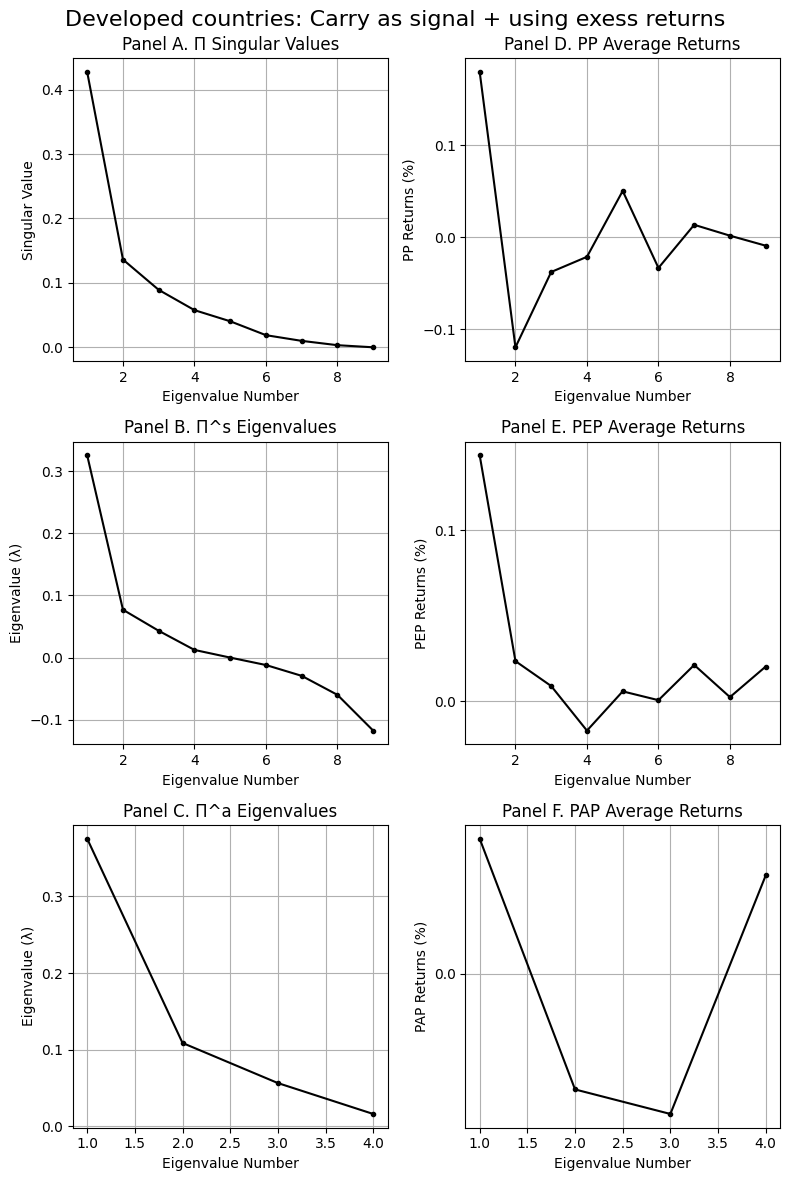

In [6]:
starting_year_to_filter = 1996
end_year_to_filter = 2024
number_of_lookback_periods = 120
number_of_PPs_to_consider = 2
number_of_PEPs_to_consider = 2
number_of_PAPs_to_consider = 2
output_dict_carry = {}

#developed_countries_excess_return_monthly = pp.calculate_log_FX_excess_returns(developed_countries_spot_monthly,developed_countries_futures_monthly)
# using past month's momentum as the signal
signal_df = pp.calculate_fx_carry_signal(developed_countries_spot_monthly,developed_countries_futures_monthly)
portfolios_key = "developed_countries_excess_returns_carry_monthly"
output_dict_carry[portfolios_key] = pp.build_PP(developed_countries_excess_return_monthly,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=None, number_of_PPs_to_consider=number_of_PPs_to_consider,
                                                                   number_of_PEPs_to_consider=number_of_PEPs_to_consider, 
                                                                   number_of_PAPs_to_consider= number_of_PAPs_to_consider)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict_carry.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict_carry[portfolios_key].keys())
print(output_dict_carry[portfolios_key]["sharpe_df"])

number_of_portfolios = developed_countries_excess_return_monthly.shape[1]
title = 'Developed countries: Carry as signal + using exess returns'

pp.singular_values_vs_realized_returns_graph(output_dict_carry, portfolios_key, number_of_portfolios, title)

### Value (5-year reversal) as signal

c:\Users\ai123\OneDrive - Imperial College London\Desktop\Principal Portfolios\principal_portfolios.py:660: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  returns_df = df[columns_to_calculate].pct_change(periods=periods)


dict_keys(['developed_countries_excess_returns_value_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df'])
return_of_simple_factor           0.408623
realized_return_of_first_n_PP     0.180100
realized_return_of_first_n_PEP    0.023614
realized_return_of_first_n_PAP    0.181480
realized_return_of_1_PP           0.089463
realized_return_of_1_PEP          0.049056
realized_return_of_2_PP           0.195210
realized_return_of_2_PEP         -0.013826
realized_return_of_3_PP          -0.309603
realized_return_of_3_PEP          0.610500
realized_return_of_4_PP           0.600822
realized_return_of_4_PEP          0.633118
realized_return_of_5_PP           0.389182
realized_return_of_5_PEP         -0.041148
realized_return_of_6_PP           0.381144
realized_return_of_6_PEP          0.041826
realized_return_of_7_PP           0.689809
realized_return

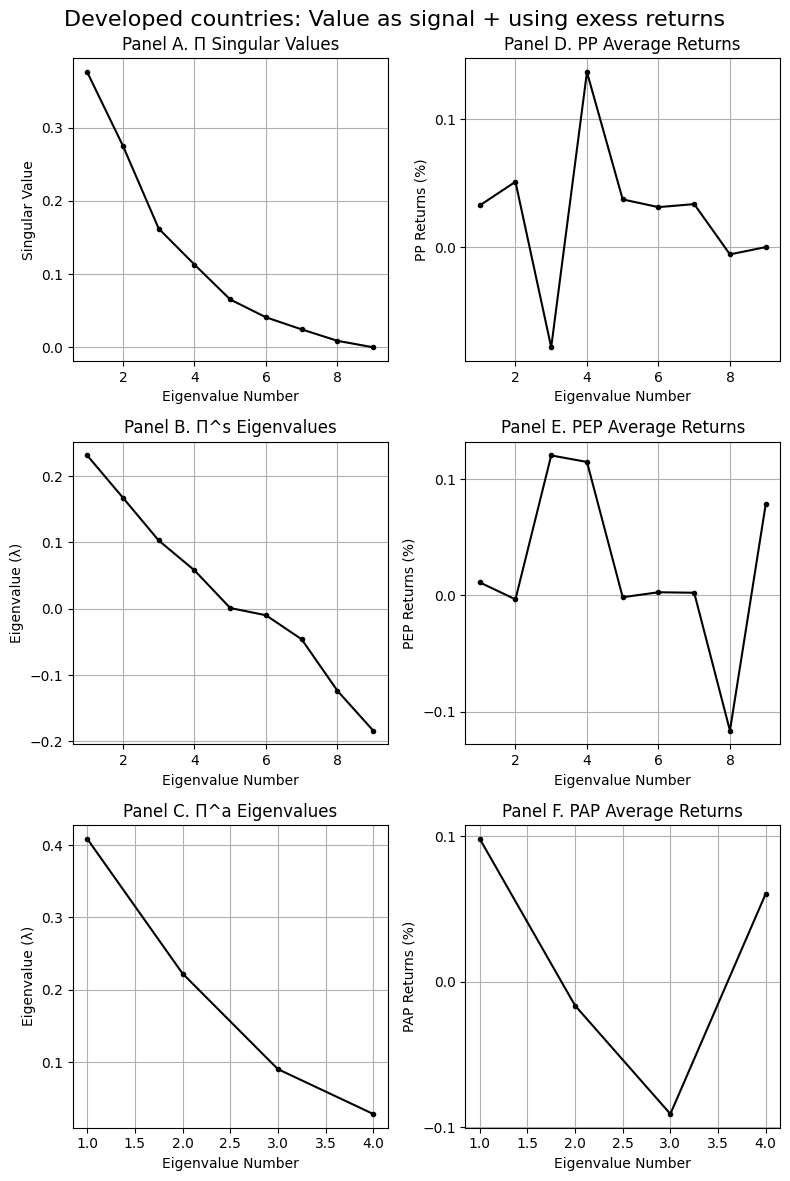

In [7]:
starting_year_to_filter = 1996
end_year_to_filter = 2024
number_of_lookback_periods = 120
number_of_PPs_to_consider = 2
number_of_PEPs_to_consider = 2
number_of_PAPs_to_consider = 2
output_dict_value = {}

#developed_countries_excess_return_monthly = pp.calculate_log_FX_excess_returns(developed_countries_spot_monthly,developed_countries_futures_monthly)
# using past month's momentum as the signal
signal_df = pp.compute_period_returns(developed_countries_spot_monthly,60)
portfolios_key = "developed_countries_excess_returns_value_monthly"
output_dict_value[portfolios_key] = pp.build_PP(developed_countries_excess_return_monthly,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=None, number_of_PPs_to_consider=number_of_PPs_to_consider,
                                                                   number_of_PEPs_to_consider=number_of_PEPs_to_consider, 
                                                                   number_of_PAPs_to_consider= number_of_PAPs_to_consider)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict_value.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict_value[portfolios_key].keys())
print(output_dict_value[portfolios_key]["sharpe_df"])

number_of_portfolios = developed_countries_excess_return_monthly.shape[1]
title = 'Developed countries: Value as signal + using exess returns'

pp.singular_values_vs_realized_returns_graph(output_dict_value, portfolios_key, number_of_portfolios, title)

In [8]:
momentum_df = output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]
carry_df = output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]
value_df = output_dict_value['developed_countries_excess_returns_value_monthly']["realized_returns_df"]

### Average over signals

In [9]:
print("average first n PAP:",pp.calculate_sharpe_ratio(0.5 * (output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['realized_return_of_first_n_PAP'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['realized_return_of_first_n_PAP'])) * math.sqrt(12))
print("average PEP and PAP 1-n:",pp.calculate_sharpe_ratio(0.5 * (output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['PEP and PAP 1-n'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['PEP and PAP 1-n'])) * math.sqrt(12))
print("average simple factors:",pp.calculate_sharpe_ratio(0.5 * (output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['return_of_simple_factor'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['return_of_simple_factor'])) * math.sqrt(12))

average first n PAP: 0.3745460230801103
average PEP and PAP 1-n: 0.33175858729348345
average simple factors: 0.2323965230080125


In [10]:
print("average first n PAP:",pp.calculate_sharpe_ratio(1/3 * (output_dict_value['developed_countries_excess_returns_value_monthly']["realized_returns_df"]['realized_return_of_first_n_PAP']+output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['realized_return_of_first_n_PAP'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['realized_return_of_first_n_PAP'])) * math.sqrt(12))
print("average PEP and PAP 1-n:",pp.calculate_sharpe_ratio(1/3 * (output_dict_value['developed_countries_excess_returns_value_monthly']["realized_returns_df"]['PEP and PAP 1-n'] +output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['PEP and PAP 1-n'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['PEP and PAP 1-n'])) * math.sqrt(12))
print("average simple factors:",pp.calculate_sharpe_ratio(1/3 * (output_dict_value['developed_countries_excess_returns_value_monthly']["realized_returns_df"]['return_of_simple_factor'] + output_dict_carry['developed_countries_excess_returns_carry_monthly']["realized_returns_df"]['return_of_simple_factor'] + output_dict_momentum['developed_countries_excess_returns_momentum_monthly']["realized_returns_df"]['return_of_simple_factor'])) * math.sqrt(12))

average first n PAP: 0.3536867539996291
average PEP and PAP 1-n: 0.23456334455101102
average simple factors: 0.32464643770846807


#### What is the Sharpe ratio of an equal weighted portfolio of developed currencies?

In [11]:
pp.calculate_sharpe_ratio(developed_countries_excess_return_monthly.iloc[:,1:].mean(axis=1)) * math.sqrt(12)

-0.09373557257946748

#### What is the Sharpe ratio of each individual currency among developed currencies?

In [12]:
developed_countries_excess_return_monthly.iloc[:,1:].apply(lambda col: pp.calculate_sharpe_ratio(col)) * math.sqrt(12)

AUD    0.073073
CAD   -0.001781
EUR   -0.111924
JPY   -0.318697
NZD    0.118701
NOK   -0.112533
SEK   -0.187849
CHF   -0.042767
GBP   -0.063128
dtype: float64

# Fama French Test Assets

In [13]:
# adresses to read the files
data_to_read_address = ["data/25_Portfolios_5x5_SizeBM_monthly.csv",
                        "data/25_Portfolios_5x5_SizeOP_monthly.csv",
                        "data/25_Portfolios_5x5_SizeINV_monthly.csv"]
factor_data_address = "data/F-F_Research_Data_5_Factors_2x3.csv"

# initialize function parameters
starting_year_to_filter = 1963
end_year_to_filter = 2020
number_of_lookback_periods = 120
number_of_PPs_to_consider = 3
number_of_PEPs_to_consider = 3
number_of_PAPs_to_consider = 3


# Reading FF factor data
factor_data_monthly = pd.read_csv(factor_data_address)
factor_data_monthly['date'] = pp.convert_date_column_for_monthly_data(factor_data_monthly)

output_dict = {}
for dataset in data_to_read_address:

    # Reading asset returns.
    portfolios_dataset_df = pd.read_csv(dataset)
    portfolios_dataset_df['date'] = pp.convert_date_column_for_monthly_data(portfolios_dataset_df)
    signal_df = pp.build_signal_df_for_1month_momentum(portfolios_dataset_df)
    

    output_dict[dataset.split("/")[1].split(".csv")[0]] = pp.build_PP(portfolios_dataset_df,signal_df,
                                                                   number_of_lookback_periods,starting_year_to_filter,end_year_to_filter,
                                                                   factor_data_monthly=factor_data_monthly)

# I calculate the results for all datasets. the results are stored in this dictionay.
print(output_dict.keys())
'''
Every value of this dictionary is itself another dictionary.
For instance the key 'sharpe_df' can be used to access the sharp values of this set of results.
'''
print(output_dict['25_Portfolios_5x5_SizeBM_monthly'].keys())
# output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"]

dict_keys(['25_Portfolios_5x5_SizeBM_monthly', '25_Portfolios_5x5_SizeOP_monthly', '25_Portfolios_5x5_SizeINV_monthly'])
dict_keys(['realized_returns_df', 'sharpe_df', 'pp_realized_mean_df', 'pp_expected_mean_df', 'pep_realized_mean_df', 'pep_expected_mean_df', 'pap_realized_mean_df', 'pap_expected_mean_df', 'regression_result_return_of_simple_factor', 'regression_result_realized_return_of_first_n_PP', 'regression_result_realized_return_of_first_n_PEP', 'regression_result_realized_return_of_first_n_PAP', 'regression_result_PEP and PAP 1-n'])


Plotting the graphs

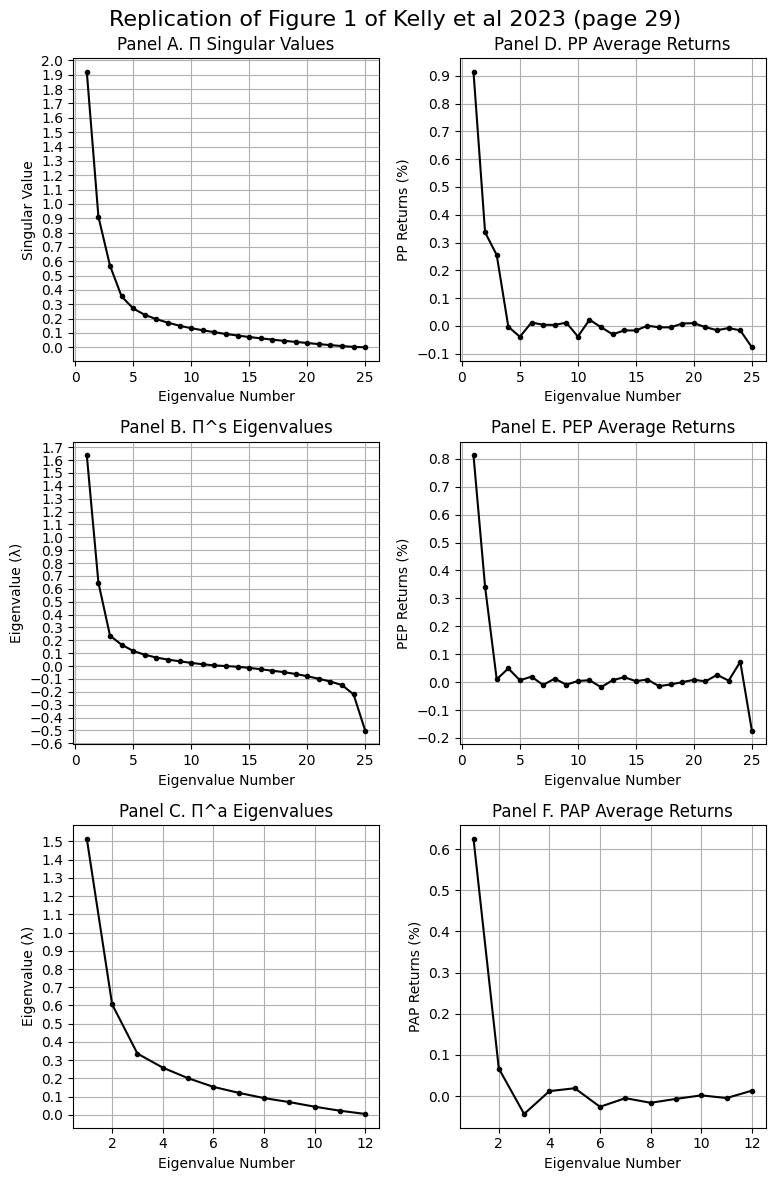

In [14]:
number_of_portfolios = portfolios_dataset_df.shape[1]
portfolios_key = "25_Portfolios_5x5_SizeBM_monthly"
title = 'Replication of Figure 1 of Kelly et al 2023 (page 29)'

pp.singular_values_vs_realized_returns_graph(output_dict, portfolios_key, number_of_portfolios, title)

Below is the replicated figure.

![alt text](Replicated_tables_or_figures/Figure_1.jpg)


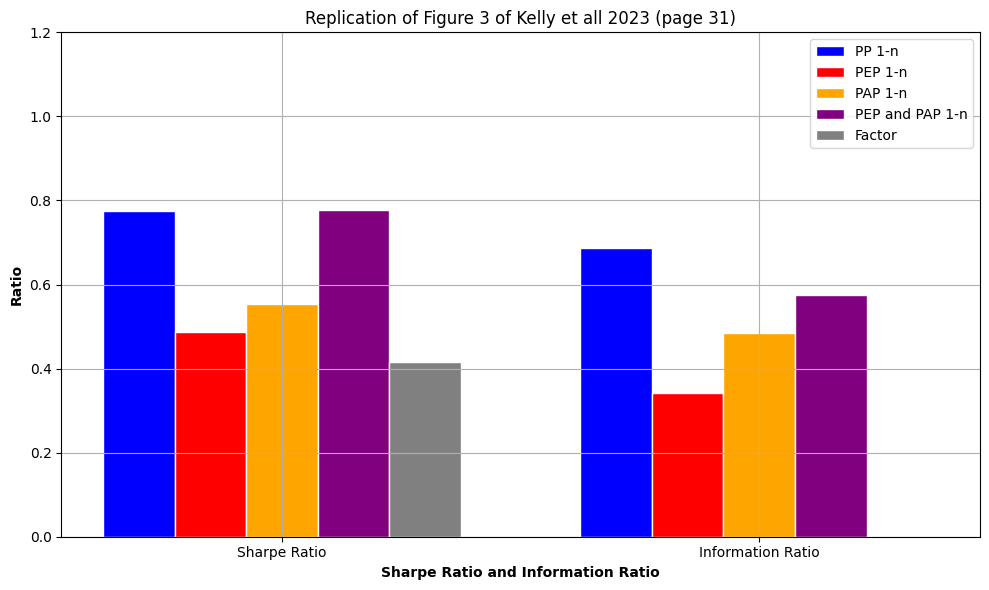

In [15]:
categories = ['Sharpe Ratio', 'Information Ratio']
bar_width = 0.15

# Data for each group (Sharpe Ratio and Information Ratio)
means_pp = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PP'),
            output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][2]]
means_pep = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP'),
              output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][2]]
means_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP'),
              output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][2]]
means_pep_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('PEP and PAP 1-n'),
                 output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][2]]
means_factor = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('return_of_simple_factor'),0]

# The position of the bars on the x-axis
r1 = np.arange(len(categories))  # for PP
r2 = [x + bar_width for x in r1]  # for PEP
r3 = [x + bar_width for x in r2]  # for PAP
r4 = [x + bar_width for x in r3]  # for PEP and PAP
r5 = [x + bar_width for x in r4]  # for Factor

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each category without error bars
ax.bar(r1, means_pp, color='blue', width=bar_width, edgecolor='white', label='PP 1-n')
ax.bar(r2, means_pep, color='red', width=bar_width, edgecolor='white', label='PEP 1-n')
ax.bar(r3, means_pap, color='orange', width=bar_width, edgecolor='white', label='PAP 1-n')
ax.bar(r4, means_pep_pap, color='purple', width=bar_width, edgecolor='white', label='PEP and PAP 1-n')
ax.bar(r5, means_factor, color='gray', width=bar_width, edgecolor='white', label='Factor')

# Setting maximum value of Y-axis
ax.set_ylim([0, 1.2])
# Add labels
ax.set_xlabel('Sharpe Ratio and Information Ratio', fontweight='bold')
ax.set_ylabel('Ratio', fontweight='bold')
ax.set_title('Replication of Figure 3 of Kelly et all 2023 (page 31)')

# Add ticks on the x-axis
ax.set_xticks([r + 2*bar_width for r in range(len(categories))])
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Below is the replicated figure.

![alt text](Replicated_tables_or_figures/Figure_3.jpg)


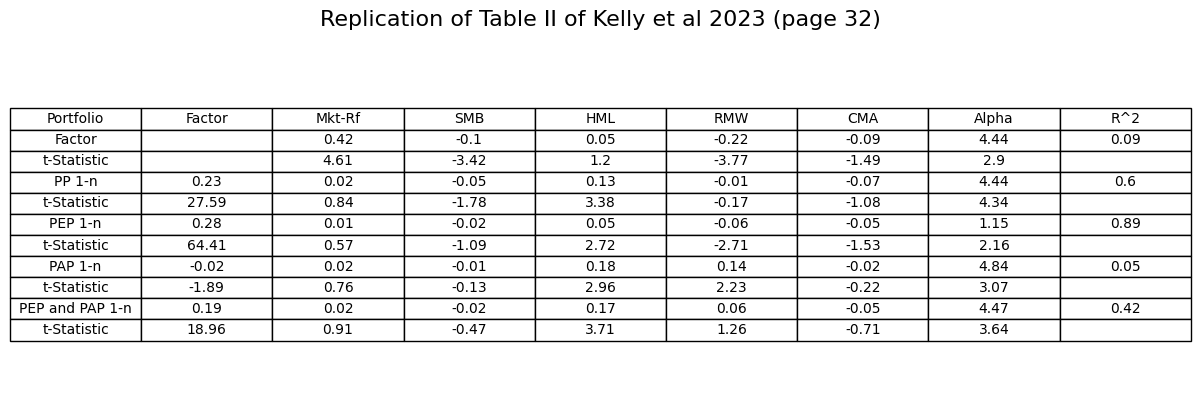

In [16]:
import pandas as pd


# Define the data as a series of lists (each list is a row)
rows = [
    ['Factor',''] + 
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_return_of_simple_factor"][0].tolist()]
    + [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_return_of_simple_factor"][3],2)],
    ['t-Statistic',''] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_return_of_simple_factor"][1].tolist()] + [''] ,

    ['PP 1-n'] + 
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][0].tolist()] +
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][1].tolist()] ,

    ['PEP 1-n']+
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][0].tolist()]+
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][1].tolist()],

    ['PAP 1-n']+
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][0].tolist()]+
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][1].tolist()],

    ['PEP and PAP 1-n'] +
    [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][0].tolist()]+
    [round(output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][3],2)],
    ['t-Statistic'] + [round(num, 2) for num in output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][1].tolist()]
]

# My ordering of columns when saving the results of regressions is different from Kelly's paper. I do this to make comparison's easier.
rows[0][7],rows[0][2] = rows[0][2], rows[0][7]
rows[1][7],rows[1][2] = rows[1][2], rows[1][7]
for row in rows[2:]:
    row[1], row[7] = row[7], row[1]  

# Define the column names
columns = ['Portfolio', 'Factor', 'Mkt-Rf', 'SMB', 'HML', 'RMW', 'CMA', 'Alpha','R^2']

# Convert the rows into a pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

# Create a matplotlib figure to render the table
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')

# Create the table and display it
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Set font size and adjust the scale of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

fig.suptitle("Replication of Table II of Kelly et al 2023 (page 32)", fontsize=16)

# Adjust layout to prevent overlap between title and table
plt.tight_layout()

# Adjust the title position to avoid overlap with the table
fig.subplots_adjust(top=0.85)


plt.show()


Below is the replicated table

![alt text](Replicated_tables_or_figures/Table_2.jpg)


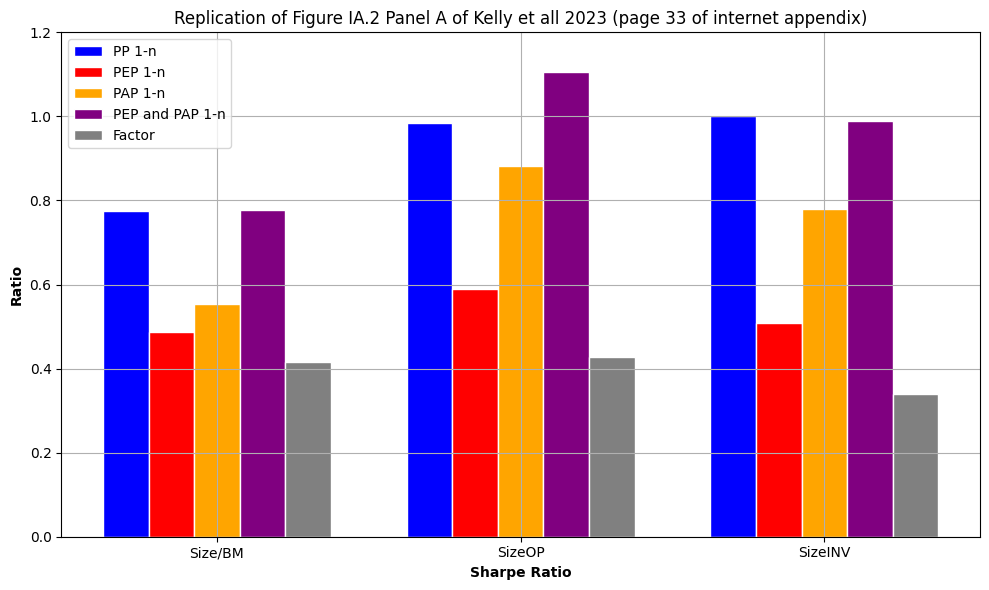

In [17]:
categories = ['Size/BM', 'SizeOP', 'SizeINV']  # Add the new category
bar_width = 0.15

# Data for each group (Sharpe Ratio and Information Ratio) including the new category data
means_pp = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PP'),
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('realized_return_of_first_n_PP'),
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('realized_return_of_first_n_PP')]  # Add data for new category
means_pep = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP'),
              output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP'),
              output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('realized_return_of_first_n_PEP')]  # Add data for new category
means_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP'),
              output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP'),
              output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('realized_return_of_first_n_PAP')]  # Add data for new category
means_pep_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('PEP and PAP 1-n'),
                 output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('PEP and PAP 1-n'),
                 output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('PEP and PAP 1-n')]  # Add data for new category
means_factor = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["sharpe_df"].get('return_of_simple_factor'),
                output_dict['25_Portfolios_5x5_SizeOP_monthly']["sharpe_df"].get('return_of_simple_factor'),
                output_dict['25_Portfolios_5x5_SizeINV_monthly']["sharpe_df"].get('return_of_simple_factor')]  # Add data for new category

# The position of the bars on the x-axis
r1 = np.arange(len(categories))  # for PP
r2 = [x + bar_width for x in r1]  # for PEP
r3 = [x + bar_width for x in r2]  # for PAP
r4 = [x + bar_width for x in r3]  # for PEP and PAP
r5 = [x + bar_width for x in r4]  # for Factor

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each category without error bars
ax.bar(r1, means_pp, color='blue', width=bar_width, edgecolor='white', label='PP 1-n')
ax.bar(r2, means_pep, color='red', width=bar_width, edgecolor='white', label='PEP 1-n')
ax.bar(r3, means_pap, color='orange', width=bar_width, edgecolor='white', label='PAP 1-n')
ax.bar(r4, means_pep_pap, color='purple', width=bar_width, edgecolor='white', label='PEP and PAP 1-n')
ax.bar(r5, means_factor, color='gray', width=bar_width, edgecolor='white', label='Factor')

# Setting maximum value of Y-axis
ax.set_ylim([0, 1.2])
# Add labels
ax.set_xlabel('Sharpe Ratio', fontweight='bold')
ax.set_ylabel('Ratio', fontweight='bold')
ax.set_title('Replication of Figure IA.2 Panel A of Kelly et all 2023 (page 33 of internet appendix)')

# Add ticks on the x-axis
ax.set_xticks([r + 2*bar_width for r in range(len(categories))])
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Below is the replicated figure.

![alt text](Replicated_tables_or_figures/IA_2_PANEL_A.jpg)


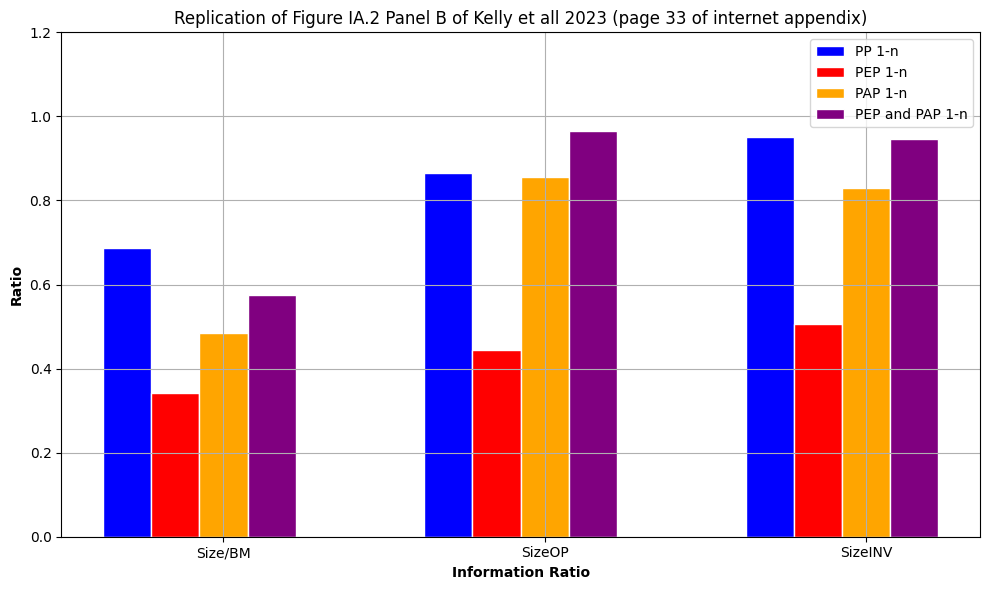

In [18]:
categories = ['Size/BM', 'SizeOP', 'SizeINV']  # Add the new category
bar_width = 0.15

# Data for each group (Sharpe Ratio and Information Ratio) including the new category data
means_pp = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PP"][2],
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_realized_return_of_first_n_PP"][2],
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_realized_return_of_first_n_PP"][2]]  # Add data for new category
means_pep = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PEP"][2],
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_realized_return_of_first_n_PEP"][2],
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_realized_return_of_first_n_PEP"][2]]  # Add data for new category
means_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_realized_return_of_first_n_PAP"][2],
            output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_realized_return_of_first_n_PAP"][2],
            output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_realized_return_of_first_n_PAP"][2]]  # Add data for new category
means_pep_pap = [output_dict['25_Portfolios_5x5_SizeBM_monthly']["regression_result_PEP and PAP 1-n"][2],
                 output_dict['25_Portfolios_5x5_SizeOP_monthly']["regression_result_PEP and PAP 1-n"][2],
                 output_dict['25_Portfolios_5x5_SizeINV_monthly']["regression_result_PEP and PAP 1-n"][2]]  # Add data for new category


# The position of the bars on the x-axis
r1 = np.arange(len(categories))  # for PP
r2 = [x + bar_width for x in r1]  # for PEP
r3 = [x + bar_width for x in r2]  # for PAP
r4 = [x + bar_width for x in r3]  # for PEP and PAP


# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add bars for each category without error bars
ax.bar(r1, means_pp, color='blue', width=bar_width, edgecolor='white', label='PP 1-n')
ax.bar(r2, means_pep, color='red', width=bar_width, edgecolor='white', label='PEP 1-n')
ax.bar(r3, means_pap, color='orange', width=bar_width, edgecolor='white', label='PAP 1-n')
ax.bar(r4, means_pep_pap, color='purple', width=bar_width, edgecolor='white', label='PEP and PAP 1-n')


# Setting maximum value of Y-axis
ax.set_ylim([0, 1.2])
# Add labels
ax.set_xlabel('Information Ratio', fontweight='bold')
ax.set_ylabel('Ratio', fontweight='bold')
ax.set_title('Replication of Figure IA.2 Panel B of Kelly et all 2023 (page 33 of internet appendix)')

# Add ticks on the x-axis
ax.set_xticks([r + 2*bar_width for r in range(len(categories))])
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


Below is the replicated figure.

![alt text](Replicated_tables_or_figures/IA_2_PANEL_B.jpg)
